As the subject area, a survey of 5,110 individuals was chosen.
This study aims to analyze the impact of various factors on the probability of stroke occurrence.

The required dataset was obtained from:
https://www.kaggle.com/fedesoriano/stroke-prediction-dataset

Let’s start by importing the necessary libraries and loading the CSV file:

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [5]:
csv_file = 'dataset.csv'
data = pd.read_csv(csv_file)


Dataset Columns Description:
- id: Unique identifier
- gender: Gender ("Male", "Female", or "Other")
- age: Age of the respondent
- hypertension: Whether the person has hypertension (0 = No, 1 = Yes)
- heart_disease: Whether the person has any heart disease (0 = No, 1 = Yes)
- ever_married: Marital status ("Yes" or "No")
- work_type: Type of work ("children", "Govt_job", "Never_worked", "Private", "Self-employed")
- Residence_type: Living area ("Urban" or "Rural")
- avg_glucose_level: Average blood glucose level
- bmi: Body Mass Index
- smoking_status: Smoking status ("formerly smoked", "never smoked", "smokes", "Unknown")
- stroke: Stroke history (1 = Had a stroke, 0 = Did not have a stroke)

ℹ️ Note: "Unknown" indicates missing smoking status information.

Let’s drop the "id" column as it’s not useful for prediction.

In [6]:
data
 
data.pop('id')


0        9046
1       51676
2       31112
3       60182
4        1665
        ...  
5105    18234
5106    44873
5107    19723
5108    37544
5109    44679
Name: id, Length: 5110, dtype: int64

Let’s check the dataset for any missing (NaN, None, or Null) values.
We'll first display dataset info:

In [7]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


The bmi column has only 4,909 non-null values, which means 201 are missing.
We'll fill these missing values with the mean of the bmi column:

In [8]:
data.bmi.replace(to_replace=np.nan, value=data.bmi.mean(),inplace=True)

/var/folders/gc/_bys3sv946l452fvrzpbw4vw0000gn/T/ipykernel_12442/3953803935.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data.bmi.replace(to_replace=np.nan, value=data.bmi.mean(),inplace=True)


After filling missing values, let's recheck for any remaining nulls:

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


To ensure full data integrity, we’ll display the unique entries in the dataset:

In [10]:
print(f"gender: {data['gender'].unique()}\n")
print(f"age: {data['age'].unique()}\n")
print(f"hypertension: {data['hypertension'].unique()}\n")
print(f"heart_disease: {data['heart_disease'].unique()}\n")
print(f"ever_married: {data['ever_married'].unique()}\n")
print(f"work_type: {data['work_type'].unique()}\n")
print(f"Residence_type: {data['Residence_type'].unique()}\n")
print(f"avg_glucose_level: {data['avg_glucose_level'].unique()}\n")
print(f"bmi: {data['bmi'].unique()}\n")
print(f"smoking_status: {data['smoking_status'].unique()}\n")
print(f"stroke: {data['stroke'].unique()}\n")


gender: ['Male' 'Female' 'Other']

age: [6.70e+01 6.10e+01 8.00e+01 4.90e+01 7.90e+01 8.10e+01 7.40e+01 6.90e+01
 5.90e+01 7.80e+01 5.40e+01 5.00e+01 6.40e+01 7.50e+01 6.00e+01 5.70e+01
 7.10e+01 5.20e+01 8.20e+01 6.50e+01 5.80e+01 4.20e+01 4.80e+01 7.20e+01
 6.30e+01 7.60e+01 3.90e+01 7.70e+01 7.30e+01 5.60e+01 4.50e+01 7.00e+01
 6.60e+01 5.10e+01 4.30e+01 6.80e+01 4.70e+01 5.30e+01 3.80e+01 5.50e+01
 1.32e+00 4.60e+01 3.20e+01 1.40e+01 3.00e+00 8.00e+00 3.70e+01 4.00e+01
 3.50e+01 2.00e+01 4.40e+01 2.50e+01 2.70e+01 2.30e+01 1.70e+01 1.30e+01
 4.00e+00 1.60e+01 2.20e+01 3.00e+01 2.90e+01 1.10e+01 2.10e+01 1.80e+01
 3.30e+01 2.40e+01 3.40e+01 3.60e+01 6.40e-01 4.10e+01 8.80e-01 5.00e+00
 2.60e+01 3.10e+01 7.00e+00 1.20e+01 6.20e+01 2.00e+00 9.00e+00 1.50e+01
 2.80e+01 1.00e+01 1.80e+00 3.20e-01 1.08e+00 1.90e+01 6.00e+00 1.16e+00
 1.00e+00 1.40e+00 1.72e+00 2.40e-01 1.64e+00 1.56e+00 7.20e-01 1.88e+00
 1.24e+00 8.00e-01 4.00e-01 8.00e-02 1.48e+00 5.60e-01 4.80e-01 1.60e-01]

hypertens

All data appear to be valid, and no additional cleaning is required.
Let's now review the summary statistics using the describe() method:

In [11]:
data.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.698018,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.400000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


We’ll create a few visualizations to understand the data better:

📌 Histograms showing the distribution of responses for each factor (separately for stroke vs. no-stroke cases)
📌 KDE (density) plots for avg_glucose_level and bmi by stroke status.

Text(0.5, 1.0, 'Distribution by gender\n according to the target variable')

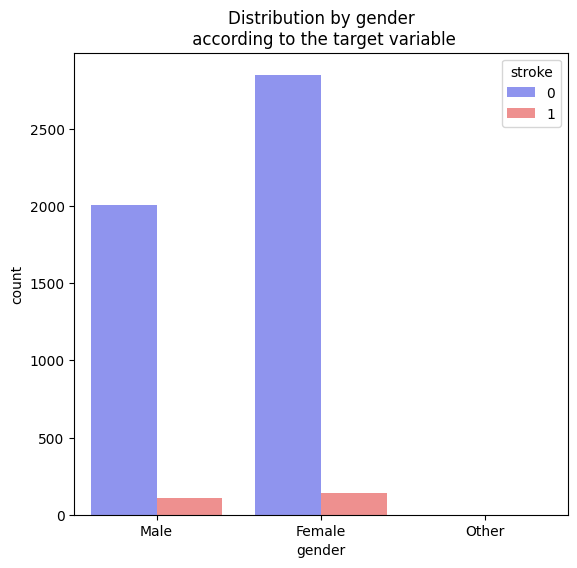

In [12]:
plt.figure(figsize=(14,6))
plt.subplot(121)
sns.countplot(x='gender',hue='stroke',data=data,palette=["#000FFF","#FF0400"], alpha=.5, linewidth=0)
plt.title('Distribution by gender\n according to the target variable')


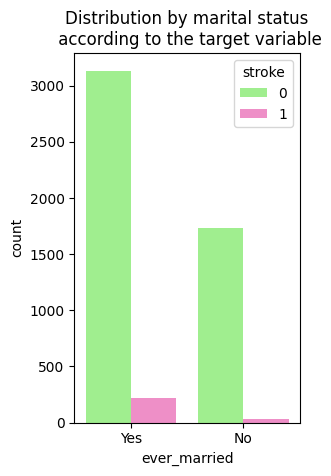

In [13]:
plt.subplot(122)
sns.countplot(x='ever_married',hue='stroke',data=data,palette=["#2EFF00","#FF0097"], alpha=.5, linewidth=0)
plt.title('Distribution by marital status\n according to the target variable')
plt.show()


Text(0.5, 1.0, 'Distribution by work type\n according to the target variable')

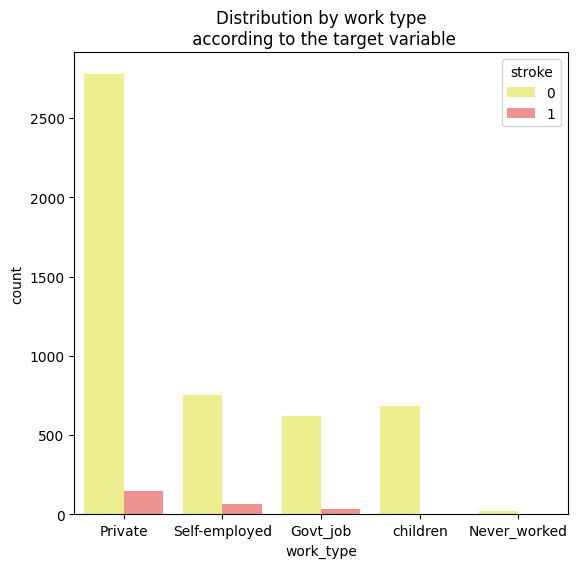

In [14]:
plt.figure(figsize=(14,6))
plt.subplot(121)
sns.countplot(x='work_type',hue='stroke',data=data,palette=["#FBFF00","#FF0C00"], alpha=.5, linewidth=0)
plt.title('Distribution by work type\n according to the target variable')


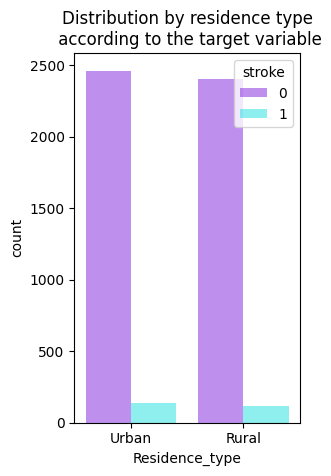

In [15]:
plt.subplot(122)
sns.countplot(x='Residence_type',hue='stroke',data=data,palette=["#8000ff","#00FFFF"], alpha=.5, linewidth=0)
plt.title('Distribution by residence type\n according to the target variable')
plt.show()


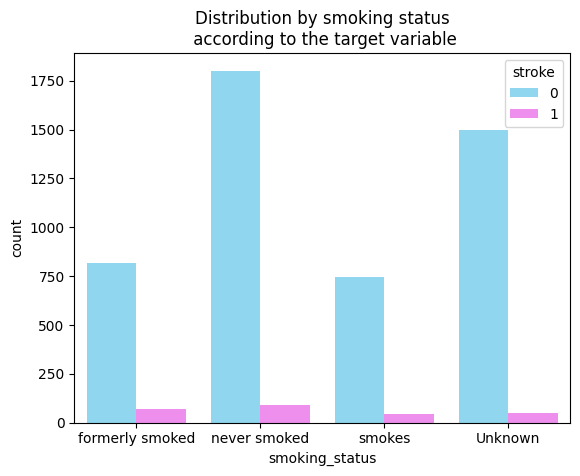

In [16]:
sns.countplot(x='smoking_status',hue='stroke',data=data,palette=["deepskyblue","fuchsia"], alpha=.5, linewidth=0)
plt.title('Distribution by smoking status\n according to the target variable')
plt.show()


Initial observation: Gender and marital status seem to have minimal impact on stroke occurrence.
The same applies to smoking status, work type, and residence type.

To better assess the influence of age, we’ll create two separate histograms:

- One for individuals without stroke

- One for individuals who had a stroke

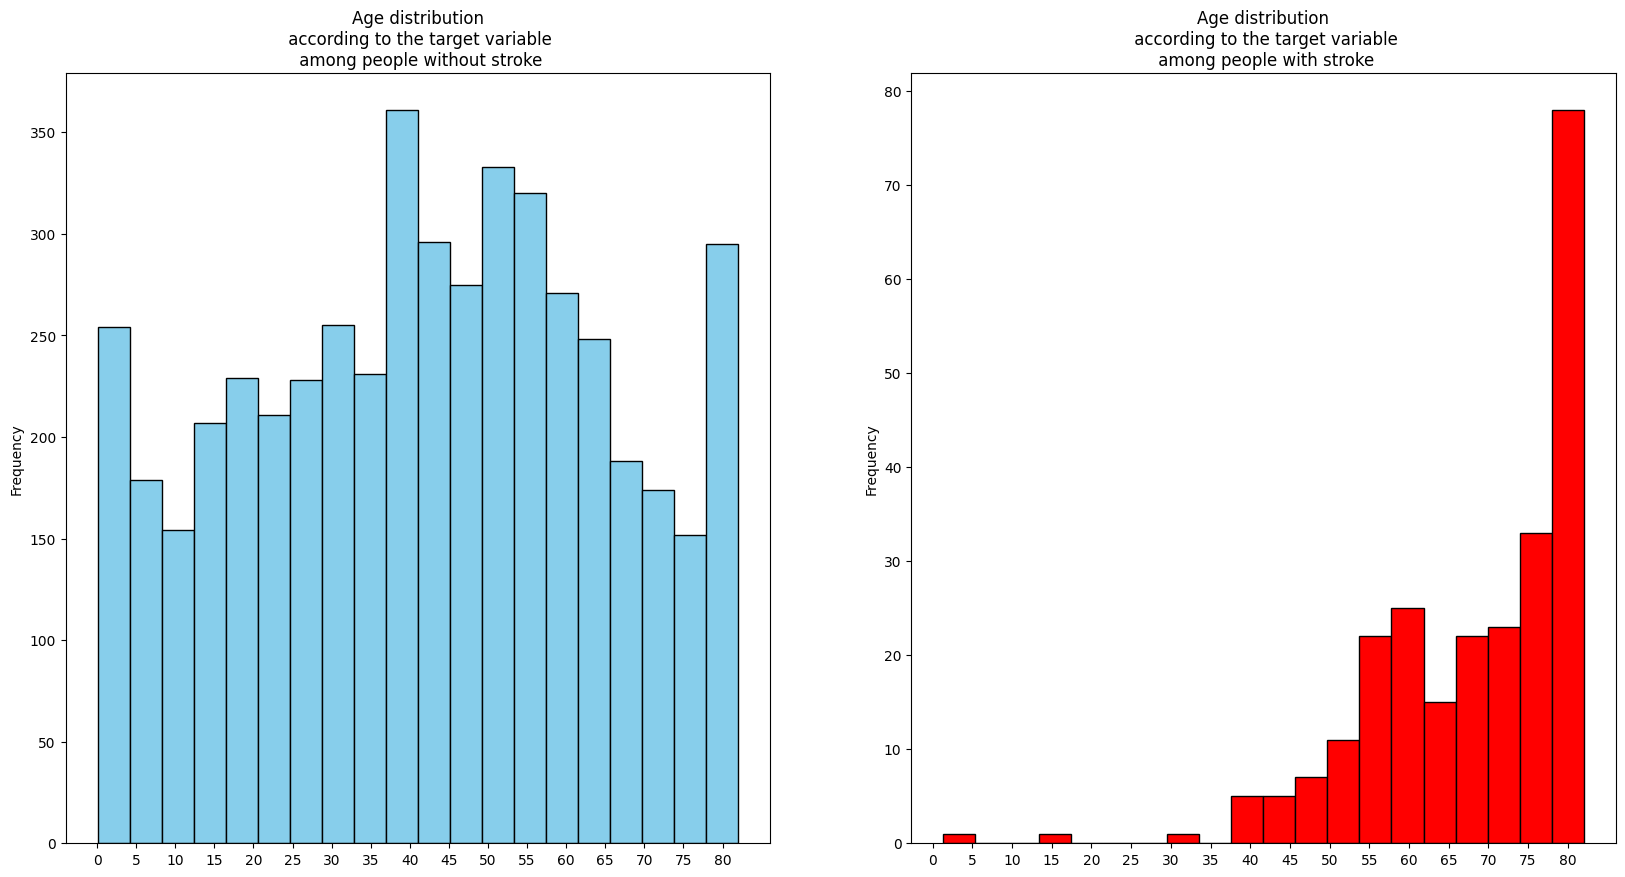

In [17]:
f,ax = plt.subplots(1,2, figsize=(20,10))
 
data.loc[data['stroke'] ==0]['age'].plot.hist(ax=ax[0], bins=20, edgecolor='black', color='skyblue')
ax[0].set_title('Age distribution\n according to the target variable\n among people without stroke')
ax1 = list(range(0, 85, 5))
ax[0].set_xticks(ax1)
 
data[data['stroke']==1]['age'].plot.hist(ax=ax[1], color='red', bins=20, edgecolor='black')
ax[1].set_title('Age distribution\n according to the target variable\n among people with stroke')
x2=list(range(0, 85, 5))
ax[1].set_xticks(x2)
plt.show();


📈 The histograms show that as age increases, the number of stroke cases also increases relative to non-stroke cases.

🔍 Conclusion: Age is an important risk factor for stroke.

Text(0.5, 1.0, 'Distribution by average glucose level\n according to the target variable')

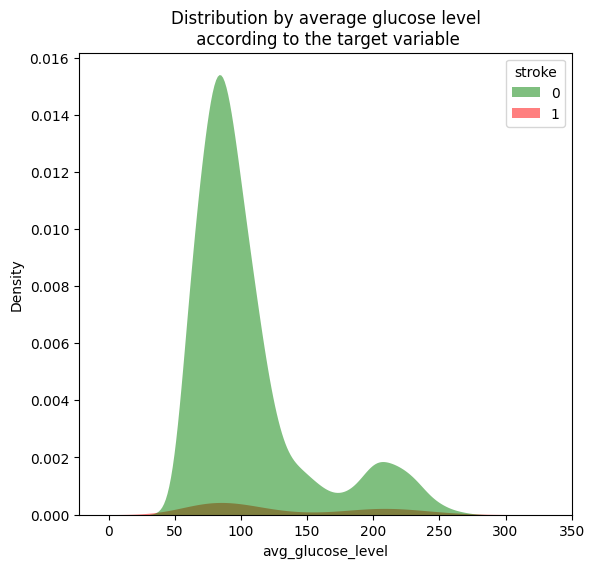

In [18]:
plt.figure(figsize=(14,6))
plt.subplot(121)
sns.kdeplot(x='avg_glucose_level',hue='stroke',data=data,fill=True, palette=["green","red"], alpha=.5, linewidth=0)
plt.title('Distribution by average glucose level\n according to the target variable')


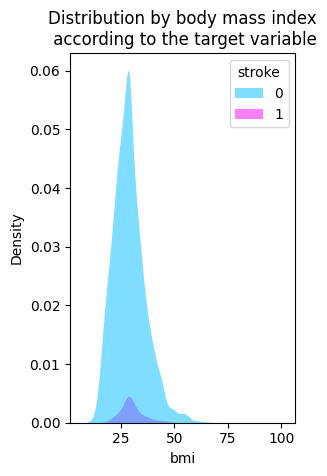

In [19]:
plt.subplot(122)
sns.kdeplot(x='bmi',hue='stroke',data=data,fill=True,palette=["deepskyblue","fuchsia"], alpha=.5, linewidth=0)
plt.title('Distribution by body mass index\n according to the target variable')
plt.show()


From the KDE plots, both average glucose level and BMI appear to influence stroke occurrence.

📌 If BMI > 25, it’s considered overweight.
📌 While elevated glucose levels have some impact, overweight status seems to be a stronger predictor of stroke risk.

The main goal of this data science system is to analyze the effect of different factors on stroke likelihood.


A decision tree-based method was selected for the following reasons:

- Interpretable
- Flexible
- Easy to use
- Frequently provides high prediction accuracy
- Widely used in computational biology

Let’s now split our dataset into dependent and independent variables:

x: all independent features

y: the target variable (stroke)

In [20]:
y = data['stroke']
x = data.drop(columns='stroke', axis=1)


We’ve already handled missing BMI values by filling them with the mean and dropped the "id" column as it’s not useful for prediction.

We'll recheck for nulls and proceed to review unique values again for validation.

In [21]:
x.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   object 
dtypes: float64(3), int64(2), object(5)
memory usage: 399.3+ KB


Let’s inspect the gender column:

We find a third category — "Other" — that only appears once.
For simplicity, we will replace it with "Male".

In [22]:
x['gender'].value_counts()


gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64

In [23]:
x['gender'] = x['gender'].replace('Other', 'Male')
x['gender'].value_counts()


gender
Female    2994
Male      2116
Name: count, dtype: int64

To avoid label encoding, we’ll create dummy variables for categorical features using one-hot encoding:

In [24]:
categorical_features = ['gender','ever_married','work_type','Residence_type','smoking_status']


In [25]:
dummy = pd.get_dummies(x[categorical_features])
x = pd.concat([x, dummy], axis=1)
x.head()


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,...,False,True,False,False,False,True,False,True,False,False
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,...,False,False,True,False,True,False,False,False,True,False
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,...,False,True,False,False,True,False,False,False,True,False
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,...,False,True,False,False,False,True,False,False,False,True
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,...,False,False,True,False,True,False,False,False,True,False


Now, we merge the dummy-encoded variables with our main dataset and drop the original categorical columns.

In [26]:
x.drop(columns=categorical_features, inplace=True)
x.head


<bound method NDFrame.head of        age  hypertension  heart_disease  avg_glucose_level        bmi  \
0     67.0             0              1             228.69  36.600000   
1     61.0             0              0             202.21  28.893237   
2     80.0             0              1             105.92  32.500000   
3     49.0             0              0             171.23  34.400000   
4     79.0             1              0             174.12  24.000000   
...    ...           ...            ...                ...        ...   
5105  80.0             1              0              83.75  28.893237   
5106  81.0             0              0             125.20  40.000000   
5107  35.0             0              0              82.99  30.600000   
5108  51.0             0              0             166.29  25.600000   
5109  44.0             0              0              85.28  26.200000   

      gender_Female  gender_Male  ever_married_No  ever_married_Yes  \
0             False   

In [27]:
x.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             5110 non-null   float64
 1   hypertension                    5110 non-null   int64  
 2   heart_disease                   5110 non-null   int64  
 3   avg_glucose_level               5110 non-null   float64
 4   bmi                             5110 non-null   float64
 5   gender_Female                   5110 non-null   bool   
 6   gender_Male                     5110 non-null   bool   
 7   ever_married_No                 5110 non-null   bool   
 8   ever_married_Yes                5110 non-null   bool   
 9   work_type_Govt_job              5110 non-null   bool   
 10  work_type_Never_worked          5110 non-null   bool   
 11  work_type_Private               5110 non-null   bool   
 12  work_type_Self-employed         51

We now have a fully numeric dataset ready for training.

In [28]:
x = x.rename(columns={'smoking_status_never smoked':'smoking_status_never_smoked','smoking_status_formerly smoked':'smoking_status_formerly_smoked'})


Since tree-based models are not sensitive to feature scaling or multicollinearity, we can proceed to split the dataset into train and test sets.

We’ll now train the model and compute the accuracy on both training and testing datasets.

📊 If the difference in accuracy is too high, we may be overfitting.

In [34]:

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)


In [35]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_train)


In [36]:
from sklearn import metrics
metrics.accuracy_score(y_train, y_pred)


0.9997553816046967

In [37]:
y_pred = clf.predict(x_test)
metrics.accuracy_score(y_test, y_pred)


0.9393346379647749

In our case, the difference is small, so we can proceed.

In [38]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100)
clf.fit(x_train,y_train)
predict = clf.predict(x_test)


In [39]:
feature_importace = pd.Series(clf.feature_importances_ , index=x.columns).sort_values(ascending=False)
feature_importace


avg_glucose_level                 0.260366
age                               0.241910
bmi                               0.219415
hypertension                      0.026238
heart_disease                     0.023632
work_type_Private                 0.022563
smoking_status_never_smoked       0.020697
Residence_type_Rural              0.020372
Residence_type_Urban              0.018916
gender_Female                     0.018711
smoking_status_Unknown            0.018707
gender_Male                       0.018694
smoking_status_formerly_smoked    0.018503
smoking_status_smokes             0.017443
work_type_Self-employed           0.016517
work_type_Govt_job                0.015027
ever_married_No                   0.010938
ever_married_Yes                  0.010279
work_type_children                0.001068
work_type_Never_worked            0.000004
dtype: float64

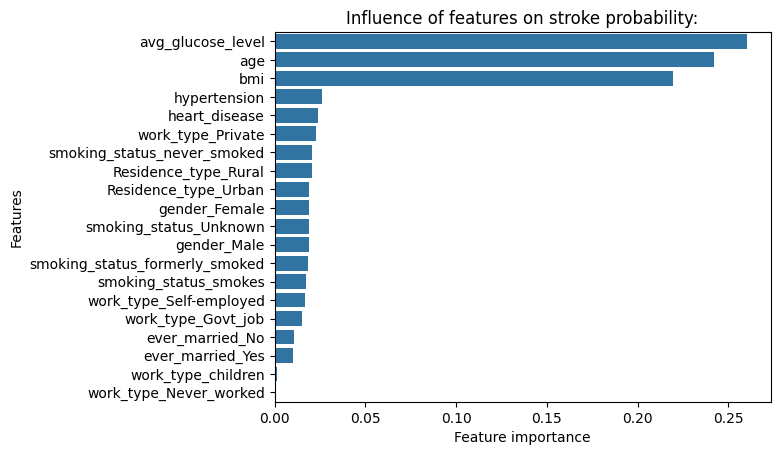

In [40]:
plt.figure(dpi=100)
sns.barplot(x = feature_importace, y = feature_importace.index )
plt.xlabel('Feature importance')
plt.ylabel('Features')
plt.title('Influence of features on stroke probability:')
plt.show()


According to the model results, the most influential factors for stroke are:

- Average glucose level

- Age

- BMI

These results make sense, as older individuals, those with excess weight, and those with diabetes are widely known to be at higher risk.
Hypertension and heart disease also contribute, but less significantly based on this dataset.